In [143]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import pywt

path='data/20210517221359_0.csv'
data = pd.read_csv(path)
dian_ya_1_0=data[['no1']]
maichong_1_0=data[['maichong']]

from nltk import flatten

dian_ya_1_0=flatten(dian_ya_1_0.values.tolist())
maichong_1_0=flatten(maichong_1_0.values.tolist())




In [144]:
maichong_1_0[2288]

1

In [145]:
res=max(maichong_1_0)
count=1
a=0
list1=[]
list2=[]
while count<=res:
    if maichong_1_0[a] == count:
        a+=1
    elif maichong_1_0[a]>count:
        list1.append(a)
        count=count+1
    if a==len(maichong_1_0):
        list1.append(a)
        break

In [146]:
list1

[2289,
 3507,
 4442,
 5245,
 5931,
 6557,
 7150,
 7712,
 8247,
 8749,
 9224,
 9682,
 10121,
 10549,
 10968,
 11386,
 11784,
 12181,
 12561,
 12932,
 13310,
 13672,
 14030,
 14384,
 14724,
 15067,
 15401,
 15731,
 16056,
 16381,
 16696,
 17017,
 17327,
 17640,
 17950,
 18256,
 18558,
 18857,
 19152,
 19445,
 19735,
 20024,
 20311,
 20592,
 20874,
 21154,
 21432,
 21708,
 21979,
 22250,
 22518,
 22787,
 23052,
 23316,
 23581,
 23841,
 24101,
 24359,
 24614,
 24869,
 25121,
 25370,
 25618,
 25869,
 26111,
 26358,
 26600,
 26839,
 27086,
 27326,
 27565,
 27804,
 28036,
 28273,
 28506,
 28739,
 28969,
 29201,
 29428,
 29658,
 29881,
 30107,
 30332,
 30555,
 30777,
 30998,
 31218,
 31436,
 31654,
 31872,
 32089,
 32302,
 32516,
 32730,
 32941,
 33154,
 33362,
 33572,
 33780,
 33989,
 34194,
 34400,
 34606,
 34809,
 35013,
 35215,
 35415,
 35617,
 35816,
 36014,
 36212,
 36412,
 36606,
 36804,
 36997,
 37189,
 37387,
 37579,
 37771,
 37964,
 38151,
 38342,
 38531,
 38719,
 38905,
 39094,
 392

In [147]:
for i in range(len(list1)):
    if i==0:
        a1=0
        a2=list1[i]
    else:
        a1=list1[i-1]
        a2=list1[i]
    tmp=((0.4/(a2-a1)))
    list2.append(tmp)

In [148]:
len(list2)

1816

In [149]:
list2

[0.00017474879860200962,
 0.0003284072249589491,
 0.0004278074866310161,
 0.00049813200498132,
 0.0005830903790087463,
 0.0006389776357827476,
 0.0006745362563237774,
 0.0007117437722419929,
 0.0007476635514018692,
 0.0007968127490039841,
 0.0008421052631578948,
 0.0008733624454148472,
 0.0009111617312072893,
 0.0009345794392523365,
 0.0009546539379474941,
 0.0009569377990430622,
 0.0010050251256281408,
 0.0010075566750629723,
 0.0010526315789473684,
 0.001078167115902965,
 0.0010582010582010583,
 0.0011049723756906078,
 0.00111731843575419,
 0.0011299435028248588,
 0.0011764705882352942,
 0.0011661807580174927,
 0.0011976047904191617,
 0.0012121212121212121,
 0.0012307692307692308,
 0.0012307692307692308,
 0.0012698412698412698,
 0.0012461059190031153,
 0.0012903225806451613,
 0.0012779552715654952,
 0.0012903225806451613,
 0.0013071895424836603,
 0.0013245033112582781,
 0.0013377926421404684,
 0.0013559322033898306,
 0.0013651877133105802,
 0.0013793103448275863,
 0.00138408304498269

In [150]:
ecg=dian_ya_1_0
a=0
index=[]
data=[]
bizhi=[]
X=0
max(list1)

450121

In [151]:
for i in range(max(list1)):
    if i >list1[a]:
        a=a+1
    X=X+float(list2[a])
    Y=float(ecg[i])
    index.append(X)
    data.append(Y)

In [152]:
len(index)

450121

In [153]:
w=pywt.Wavelet('db8')
maxlev=pywt.dwt_max_level(len(data),w.dec_len)
print('maximum level is'+str(maxlev))
threshold=1

maximum level is14


In [154]:
coeffs = pywt.wavedec(data,'db8',level=maxlev)
for i in range(1,len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i],threshold*max(coeffs[i]))

In [155]:
datarec=pywt.waverec(coeffs,'db8')
mintime=0
maxtime=mintime+len(data)+1
a=mean(datarec)
for i in range(max(list1)):
    Z=float(abs(datarec[i]-a)/a*100)
    bizhi.append(Z)

Text(0.5, 1.0, 'raw single')

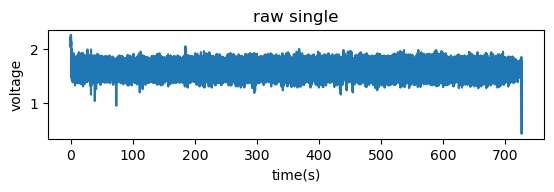

In [156]:
plt.figure
plt.subplot(3,1,1)
plt.plot(index[mintime:maxtime],data[mintime:maxtime-1])
plt.xlabel('time(s)')
plt.ylabel('voltage')
plt.title('raw single')

Text(0.5, 1.0, 'de-noised single use wavelet techniques')

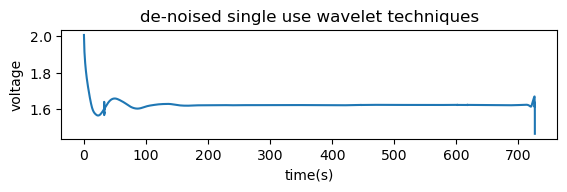

In [157]:
plt.subplot(3,1,2)
plt.plot(index[mintime:maxtime],datarec[mintime:maxtime-1])
plt.xlabel('time(s)')
plt.ylabel('voltage')
plt.title('de-noised single use wavelet techniques')

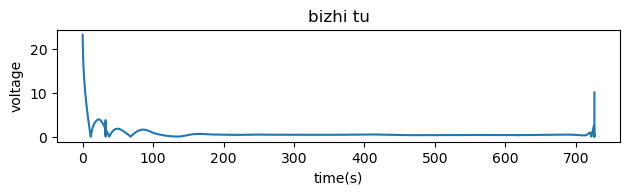

In [158]:
plt.subplot(3,1,3)
plt.plot(index[mintime:maxtime],bizhi[mintime:maxtime-1])
plt.xlabel('time(s)')
plt.ylabel('voltage')
plt.title('bizhi tu')
plt.tight_layout()
plt.show()

In [177]:
bizhi=[]
ymean=mean(datarec)
for i in range(len(datarec)):
    bizhi.append(abs(datarec[i]-ymean)/ymean*100)
outlier_x=[]
overier_x=[]
outlier_n=0
lsttype=[]
flag=-1
b=len(datarec)
for i in range(b):
    if(bizhi[i]<=1) and flag!=0:
        flag=0
        outlier_n=outlier_n+1
        lsttype.append("正常")
        outlier_x.append(i)
        overier_x.append(i)
    elif(bizhi[i]>1)and (bizhi[i]<=1.6) and flag!=1:
        flag=1
        outlier_n=outlier_n+1
        lsttype.append("微小断丝")
        outlier_x.append(i)
        overier_x.append(i)
    elif(bizhi[i]>1.6)and (bizhi[i]<=2.5) and flag!=2:
        flag=2
        outlier_n=outlier_n+1
        lsttype.append("轻度断丝")
        outlier_x.append(i)
        overier_x.append(i)
    elif(bizhi[i]>2.5)and (bizhi[i]<=5) and flag!=3:
        flag=3
        outlier_n=outlier_n+1
        lsttype.append("中度断丝")
        outlier_x.append(i)
        overier_x.append(i)
    elif(bizhi[i]>5)and (bizhi[i]<=14) and flag!=4:
        flag=4
        outlier_n=outlier_n+1
        lsttype.append("内部断股")
        outlier_x.append(i)
        overier_x.append(i)
    elif(bizhi[i]>14) and flag!=5:
        flag=5
        outlier_n=outlier_n+1
        lsttype.append("重度断丝")
        outlier_x.append(i)
        overier_x.append(i)
overier_x.append(len(datarec))

In [209]:
len(index)

450121

In [183]:
overier_x[50]

450122

In [175]:
outlier_x

[0,
 5752,
 12107,
 14004,
 14693,
 15164,
 16910,
 17569,
 18870,
 28668,
 29948,
 29960,
 29969,
 29976,
 29983,
 30001,
 30005,
 30007,
 30023,
 30025,
 30027,
 30040,
 30043,
 30045,
 30054,
 30058,
 30076,
 30085,
 30219,
 31190,
 34739,
 36633,
 40815,
 43431,
 49626,
 53366,
 53835,
 57826,
 293419,
 296560,
 307133,
 307909,
 317703,
 320930,
 331963,
 336511,
 436863,
 438603,
 440647,
 445352]

In [174]:
lsttype


['重度断丝',
 '内部断股',
 '中度断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '中度断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '中度断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '中度断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '微小断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '中度断丝',
 '轻度断丝',
 '微小断丝',
 '正常',
 '微小断丝',
 '正常',
 '微小断丝',
 '轻度断丝',
 '中度断丝',
 '内部断股']

maximum level is 14


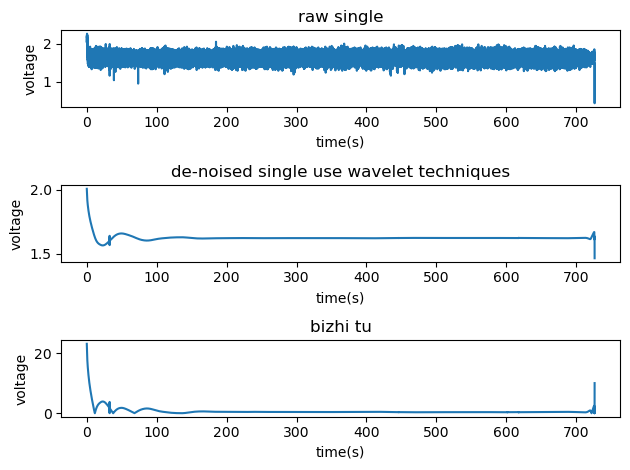

50
缺陷数量 41
[0.00017474879860200962, '内部断股', 1.8958015709560827, '内部断丝', 7.125615554843762, '中度断丝', 9.17112446946923, '轻度断丝', 9.963704160563802, '微小断丝', 10.51634241346998, '正常', 12.666841415466754, '微小断丝', 13.509439924519022, '轻度断丝', 15.217801867444086, '中度断丝', 30.278286336784063, '轻度断丝', 32.51875881959741, '微小断丝', 32.53999775765051, '正常', 32.55592696119034, '微小断丝', 32.568316341721314, '轻度断丝', 32.58070572225229, '中度断丝', 32.61256412933194, '轻度断丝', 32.619643775349644, '微小断丝', 32.623183598358494, '正常', 32.6515021824293, '微小断丝', 32.65504200543815, '轻度断丝', 32.658581828447, '中度断丝', 32.681590678004525, '轻度断丝', 32.6869004125178, '微小断丝', 32.69044023552665, '正常', 32.70636943906648, '微小断丝', 32.71344908508418, '轻度断丝', 32.74530749216383, '微小断丝', 32.76123669570366, '轻度断丝', 32.999285859911836, '微小断丝', 34.749265657891456, '正常', 41.46224371431898, '微小断丝', 45.25472020334974, '轻度断丝', 54.16371066040606, '微小断丝', 60.11115740775997, '正常', 75.38199293061182, '微小断丝', 85.42239697103041, '轻度断丝', 86.7264158835616,

In [20]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import pywt

# 定义数据文件路径
path = 'data/20210517221359_0.csv'

# 读取数据文件
data = pd.read_csv(path)

# 提取所需的电压数据和脉冲数据列
dian_ya_1_0 = data[['no1']]
maichong_1_0 = data[['maichong']]

from nltk import flatten

# 将DataFrame转换为列表
dian_ya_1_0 = flatten(dian_ya_1_0.values.tolist())
maichong_1_0 = flatten(maichong_1_0.values.tolist())

def xiaobo(maichong_1_0, dian_ya_1_0):
    # 获取脉冲数据中的最大值，即最大传感器数
    res = max(maichong_1_0)
    count = 1
    a = 0
    list1 = []
    list2 = []

    # 找到脉冲数据中每个传感器数的索引
    while count <= res:
        if maichong_1_0[a] == count:
            a += 1
        elif maichong_1_0[a] > count:
            list1.append(a)
            count = count + 1
        if a == len(maichong_1_0):
            list1.append(a)
            break

    # 计算每个区间的临界值
    for i in range(len(list1)):
        if i == 0:
            a1 = 0
            a2 = list1[i]
        else:
            a1 = list1[i - 1]
            a2 = list1[i]
        tmp = ((0.4 / (a2 - a1)))
        list2.append(tmp)

    ecg = dian_ya_1_0
    a = 0
    index = []
    data = []
    bizhi = []
    X = 0

    # 根据临界值对电压数据进行处理
    for i in range(max(list1)):
        if i > list1[a]:
            a = a + 1
        X = X + float(list2[a])
        Y = float(ecg[i])
        index.append(X)
        data.append(Y)

    w = pywt.Wavelet('db8')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    print('maximum level is ' + str(maxlev))
    threshold = 1
    coeffs = pywt.wavedec(data, 'db8', level=maxlev)

    # 对每一层的系数进行阈值处理
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))

    # 小波重构
    datarec = pywt.waverec(coeffs, 'db8')
    mintime = 0
    maxtime = mintime + len(data) + 1
    a = mean(datarec)

    # 计算相对差值百分比
    for i in range(max(list1)):
        Z = float(abs(datarec[i] - a) / a * 100)
        bizhi.append(Z)

    return index, data, datarec, bizhi, mintime, maxtime

def draw(index,data,datarec,bizhi,mintime,maxtime):
    plt.figure
    plt.subplot(3, 1, 1)
    plt.plot(index[mintime:maxtime], data[mintime:maxtime - 1])
    plt.xlabel('time(s)')
    plt.ylabel('voltage')
    plt.title('raw single')
    plt.subplot(3, 1, 2)
    plt.plot(index[mintime:maxtime], datarec[mintime:maxtime - 1])
    plt.xlabel('time(s)')
    plt.ylabel('voltage')
    plt.title('de-noised single use wavelet techniques')
    plt.subplot(3, 1, 3)
    plt.plot(index[mintime:maxtime], bizhi[mintime:maxtime - 1])
    plt.xlabel('time(s)')
    plt.ylabel('voltage')
    plt.title('bizhi tu')
    plt.tight_layout()
    plt.show()

def lianghua(datarec,n):
    bizhi = []
    ymean = mean(datarec)
    for i in range(len(datarec)):
        bizhi.append(abs(datarec[i] - ymean) / ymean * 100)
    outlier_x = []
    overier_x = []
    outlier_n = 0
    lsttype = []
    flag = -1
    b = len(datarec)
    for i in range(b):
        if (bizhi[i] <= 1) and flag != 0:
            flag = 0
            outlier_n = outlier_n + 1
            lsttype.append("正常")
            outlier_x.append(i)
            overier_x.append(i)
        elif (bizhi[i] > 1) and (bizhi[i] <= 1.6) and flag != 1:
            flag = 1
            outlier_n = outlier_n + 1
            lsttype.append("微小断丝")
            outlier_x.append(i)
            overier_x.append(i)
        elif (bizhi[i] > 1.6) and (bizhi[i] <= 2.5) and flag != 2:
            flag = 2
            outlier_n = outlier_n + 1
            lsttype.append("轻度断丝")
            outlier_x.append(i)
            overier_x.append(i)
        elif (bizhi[i] > 2.5) and (bizhi[i] <= 5) and flag != 3:
            flag = 3
            outlier_n = outlier_n + 1
            lsttype.append("中度断丝")
            outlier_x.append(i)
            overier_x.append(i)
        elif (bizhi[i] > 5) and (bizhi[i] <= 14) and flag != 4:
            flag = 4
            outlier_n = outlier_n + 1
            lsttype.append("内部断丝")
            outlier_x.append(i)
            overier_x.append(i)
        elif (bizhi[i] > 14) and flag != 5:
            flag = 5
            outlier_n = outlier_n + 1
            lsttype.append("内部断股")
            outlier_x.append(i)
            overier_x.append(i)
    overier_x.append(len(datarec)-1)
    return outlier_x,overier_x,outlier_n,lsttype
res = max(maichong_1_0)
count = 1
a = 0
list1 = []
list2 = []

# 找到脉冲数据中每个传感器数的索引
while count <= res:
    if maichong_1_0[a] == count:
        a += 1
    elif maichong_1_0[a] > count:
        list1.append(a)
        count = count + 1
    if a == len(maichong_1_0):
        list1.append(a)
        break

    # 计算每个区间的临界值
for i in range(len(list1)):
    if i == 0:
        a1 = 0
        a2 = list1[i]
    else:
        a1 = list1[i - 1]
        a2 = list1[i]
    tmp = ((0.4 / (a2 - a1)))
    list2.append(tmp)

# maichong_1_0=maichong_1_0[list1[10]:list1[1800]]
# dian_ya_1_0=dian_ya_1_0[list1[10]:list1[1800]]
n=3
index,data,datarec,bizhi,mintime,maxtime=xiaobo(maichong_1_0,dian_ya_1_0)
outlier_x,overier_x,outlier_n,lsttype=lianghua(datarec,n)
draw(index,data,datarec,bizhi,mintime,maxtime)
my_dict={}
for i in lsttype:
    if i in my_dict:
        my_dict[i]+=1
    else:
        my_dict[i]=1
print(outlier_n)
print("缺陷数量",outlier_n-my_dict["正常"])

alst1=[]
weizhi=[]
for i in range(len(outlier_x)):
    alst1.append(index[outlier_x[i]])
    alst1.append(lsttype[i])
    weizhi.append(index[overier_x[i+1]-1])
print(alst1)
print(weizhi)







In [29]:
import numpy as np
import csv

in_data=np.array([weizhi,lsttype])
in_data=in_data.transpose()
f=open("clean_data/s_1.csv","w",encoding="utf-8",newline='')
csv_writer=csv.writer(f)

csv_writer.writerows(in_data)

f.close()


In [27]:
in_data

array([['1.895218480577074', '内部断股'],
       ['7.124607998168699', '内部断丝'],
       ['9.170007151033476', '中度断丝'],
       ['9.962527689975566', '轻度断丝'],
       ['10.51514480867956', '微小断丝'],
       ['12.66559530954775', '正常'],
       ['13.508161969247457', '微小断丝'],
       ['15.216445935240696', '轻度断丝'],
       ['30.27656959858664', '中度断丝'],
       ['32.51698890809298', '轻度断丝'],
       ['32.538227846146086', '微小断丝'],
       ['32.55415704968591', '正常'],
       ['32.56654643021689', '微小断丝'],
       ['32.578935810747865', '轻度断丝'],
       ['32.61079421782752', '中度断丝'],
       ['32.61787386384522', '轻度断丝'],
       ['32.62141368685407', '微小断丝'],
       ['32.64973227092487', '正常'],
       ['32.65327209393372', '微小断丝'],
       ['32.65681191694257', '轻度断丝'],
       ['32.6798207665001', '中度断丝'],
       ['32.685130501013376', '轻度断丝'],
       ['32.688670324022226', '微小断丝'],
       ['32.70459952756205', '正常'],
       ['32.71167917357975', '微小断丝'],
       ['32.74353758065941', '轻度断丝'],
       ['32.759

In [34]:
index[0]

0.00017474879860200962

In [35]:
path="clean_data/s_1.csv"
data= pd.read_csv(path,encoding='utf-8')
weizhi=data[['weizhi']]
ttype =data[['type']]


In [43]:
weizhi

,weizhi
0,2.406143
1,5.453280
2,6.841259
3,7.870313
4,12.549418
...,...
67,726.213134
68,726.257823
69,726.273852
70,726.303966


In [38]:
ttype

,type
0,内部断丝
1,中度断丝
2,轻度断丝
3,微小断丝
4,正常
...,...
67,微小断丝
68,正常
69,微小断丝
70,轻度断丝


In [44]:
path="clean_data/s_1.csv"
data= pd.read_csv(path,encoding='utf-8')
weizhi=data[['weizhi']]
ttype =data[['type']]
weizhi= flatten(weizhi.values.tolist())
ttype = flatten(ttype.values.tolist())


In [47]:
type(weizhi[0])

float

In [48]:
len(weizhi)

72

In [51]:
len(ttype)

72

726.4001719030548

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import flatten
def solve_dict(lsttype,outlier_n):
    my_dict = {}
    for i in lsttype:
        if i in my_dict:
            my_dict[i] += 1
        else:
            my_dict[i] = 1
    print(outlier_n)
    print("缺陷数量", outlier_n - my_dict["正常"])
    return my_dict
def get_len(lsttype,weizhi):
	my_dict_len={}
	for i in range(len(weizhi)):
		if i ==0:
			length=float(weizhi[i])-0
		else:
			length=float(weizhi[i])-float(weizhi[i-1])
		if lsttype[i] in my_dict_len:
			my_dict_len[lsttype[i]]+=length
		else:
			my_dict_len[lsttype[i]]=length
	return my_dict_len


path="clean_data/s_1.csv"
data= pd.read_csv(path,encoding='utf-8')
weizhi=data[['weizhi']]
ttype =data[['type']]
weizhi= flatten(weizhi.values.tolist())
ttype = flatten(ttype.values.tolist())

my_dict=solve_dict(ttype,len(ttype))
my_dict_len=get_len(ttype,weizhi)
print(my_dict)
print(my_dict_len)



# quality= 0 if '重度断股' in ttype else 1



72
缺陷数量 51
{'重度断丝': 4, '中度断丝': 6, '轻度断丝': 11, '微小断丝': 30, '正常': 21}
{'重度断丝': 3.8254892373893985, '中度断丝': 3.872067092566207, '轻度断丝': 18.05089829429152, '微小断丝': 34.46296035629164, '正常': 666.1887250905605}


In [59]:
sum(my_dict_len.values())

726.4001400710993

In [61]:
my_dict

{'重度断丝': 4, '中度断丝': 6, '轻度断丝': 11, '微小断丝': 30, '正常': 21}

In [62]:
my_dict_len

{'重度断丝': 3.8254892373893985,
 '中度断丝': 3.872067092566207,
 '轻度断丝': 18.05089829429152,
 '微小断丝': 34.46296035629164,
 '正常': 666.1887250905605}

In [63]:
my_dict.values()

dict_values([4, 6, 11, 30, 21])

In [64]:
list(my_dict.values())

[4, 6, 11, 30, 21]

In [65]:
num_loss=np.array(list(my_dict.values()))

In [66]:
num_loss

array([ 4,  6, 11, 30, 21])

In [67]:
num_loss=np.array(list(my_dict.values()))
len_loss=np.array(list(my_dict_len.values()))
num_loss=num_loss/sum(num_loss)
len_loss=len_loss/sum(len_loss)


In [68]:
num_loss

array([0.05555556, 0.08333333, 0.15277778, 0.41666667, 0.29166667])

In [69]:
len_loss

array([0.00526637, 0.00533049, 0.0248498 , 0.04744349, 0.91710985])

In [76]:
tylist=[]
for i in my_dict:
    if i == '正常':
        tylist.append(1)
    elif i == '微小断丝':
        tylist.append(2)
    elif i == '轻度断丝':
        tylist.append(4)
    elif i == '中度断丝':
        tylist.append(8)
    elif i == '重度断丝':
        tylist.append(16)

In [77]:
tylist

[16, 8, 4, 2, 1]

In [78]:
type_loss=np.array(tylist)
standard=sum(type_loss*num_loss*len_loss)


In [79]:
standard

0.3304474801965168

In [80]:
standard_num=len(ttype)-my_dict['正常']


In [81]:
standard_num

51

In [82]:
standard_len=sum(my_dict_len.values())-my_dict_len['正常']
standard_len

60.211414980538734

In [87]:
np_weizhi=[]
for i in range(len(ttype)):
	if ttype[i]!='正常':
		np_weizhi.append(weizhi[i])

In [89]:
len(np_weizhi)

51

In [92]:
np_weizhi=[]
for i in range(len(ttype)):
	if ttype[i]!='正常':
		np_weizhi.append(weizhi[i])
np_weizhi=np.array(np_weizhi)
standard_position=sum(abs(np_weizhi-363.2)/363.2/standard_len)

In [93]:
standard_position

0.8001345810864823

In [94]:
standard_meet=np_weizhi.std()

In [95]:
standard_meet

249.70275648615086

In [96]:
save_data=np.array([standard_extend,standard_len,standard_num,standard_position,standard_meet])

NameError: name 'standard_extend' is not defined

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import flatten
def solve_dict(lsttype,outlier_n):
    my_dict = {}
    for i in lsttype:
        if i in my_dict:
            my_dict[i] += 1
        else:
            my_dict[i] = 1
    print(outlier_n)
    print("缺陷数量", outlier_n - my_dict["正常"])
    return my_dict
def get_len(lsttype,weizhi):
	my_dict_len={}
	for i in range(len(weizhi)):
		if i ==0:
			length=float(weizhi[i])-0
		else:
			length=float(weizhi[i])-float(weizhi[i-1])
		if lsttype[i] in my_dict_len:
			my_dict_len[lsttype[i]]+=length
		else:
			my_dict_len[lsttype[i]]=length
	return my_dict_len


path="clean_data/s_1.csv"
data= pd.read_csv(path,encoding='utf-8')
weizhi=data[['weizhi']]
ttype =data[['type']]
weizhi= flatten(weizhi.values.tolist())
ttype = flatten(ttype.values.tolist())
# 直接质量指标
standard_quality= 0 if '内部断股' in ttype else 1
# 如果内部断股，不向下考虑
my_dict=solve_dict(ttype,len(ttype))
my_dict_len=get_len(ttype,weizhi)
print(my_dict)
print(my_dict_len)

# 获取程度指标
num_loss=np.array(list(my_dict.values()))
len_loss=np.array(list(my_dict_len.values()))
num_loss=num_loss/sum(num_loss)
len_loss=len_loss/sum(len_loss)
tylist=[]
for i in my_dict:
	if i == '正常':
		tylist.append(1)
	elif i == '微小断丝':
		tylist.append(2)
	elif i == '轻度断丝':
		tylist.append(4)
	elif i == '中度断丝':
		tylist.append(8)
	elif i == '重度断丝':
		tylist.append(16)
type_loss=np.array(tylist)
standard_extend=sum(type_loss*num_loss*len_loss)
print(standard_extend)


# 获得异常数量指标

standard_num=len(ttype)-my_dict['正常']

# 获得异常长度指标


standard_len=sum(my_dict_len.values())-my_dict_len['正常']


# 位置危险系数指标

np_weizhi=[]
for i in range(len(ttype)):
	if ttype[i]!='正常':
		np_weizhi.append(weizhi[i])
np_weizhi=np.array(np_weizhi)
standard_position=sum(abs(np_weizhi-363.2)/363.2/standard_len)

# 缺陷集中程度指标

standard_meet=np_weizhi.std()

save_data=np.array([standard_extend,standard_len,standard_num,standard_position,standard_meet])




72
缺陷数量 51
{'重度断丝': 4, '中度断丝': 6, '轻度断丝': 11, '微小断丝': 30, '正常': 21}
{'重度断丝': 3.8254892373893985, '中度断丝': 3.872067092566207, '轻度断丝': 18.05089829429152, '微小断丝': 34.46296035629164, '正常': 666.1887250905605}
0.3304474801965168


In [98]:
save_data

array([  0.33044748,  60.21141498,  51.        ,   0.80013458,
       249.70275649])

In [99]:
import csv
import pandas as pd
import numpy as np
from nltk import flatten
def solve_dict(lsttype,outlier_n):
    my_dict = {}
    for i in lsttype:
        if i in my_dict:
            my_dict[i] += 1
        else:
            my_dict[i] = 1
    print(outlier_n)
    print("缺陷数量", outlier_n - my_dict["正常"])
    return my_dict
def get_len(lsttype,weizhi):
	my_dict_len={}
	for i in range(len(weizhi)):
		if i ==0:
			length=float(weizhi[i])-0
		else:
			length=float(weizhi[i])-float(weizhi[i-1])
		if lsttype[i] in my_dict_len:
			my_dict_len[lsttype[i]]+=length
		else:
			my_dict_len[lsttype[i]]=length
	return my_dict_len

def get_data(path):
	data = pd.read_csv(path, encoding='utf-8')
	weizhi = data[['weizhi']]
	ttype = data[['type']]
	weizhi = flatten(weizhi.values.tolist())
	ttype = flatten(ttype.values.tolist())
	return weizhi,ttype
def get_standard_extend(my_dict,my_dict_len,ttype):
	num_loss = np.array(list(my_dict.values()))
	len_loss = np.array(list(my_dict_len.values()))
	num_loss = num_loss / sum(num_loss)
	len_loss = len_loss / sum(len_loss)
	tylist = []
	for i in my_dict:
		if i == '正常':
			tylist.append(1)
		elif i == '微小断丝':
			tylist.append(2)
		elif i == '轻度断丝':
			tylist.append(4)
		elif i == '中度断丝':
			tylist.append(8)
		elif i == '重度断丝':
			tylist.append(16)
	type_loss = np.array(tylist)
	standard_extend = sum(type_loss * num_loss * len_loss)
	# print(standard_extend)


	standard_num = len(ttype) - my_dict['正常']

	standard_len = sum(my_dict_len.values()) - my_dict_len['正常']

	np_weizhi = []
	for i in range(len(ttype)):
		if ttype[i] != '正常':
			np_weizhi.append(weizhi[i])
	np_weizhi = np.array(np_weizhi)
	standard_position = sum(abs(np_weizhi - 363.2) / 363.2 / standard_len)

	standard_meet = np_weizhi.std()
	save_data = np.array([standard_extend, standard_len, standard_num, standard_position, standard_meet])
	return save_data



for i in range(6):
	path="clean_data/s_"+str(i+1)+".csv"
	weizhi,ttype=get_data(path)
	standard_quality= 0 if '内部断股' in ttype else 1
	if standard_quality== 1:
		my_dict = solve_dict(ttype, len(ttype))
		my_dict_len = get_len(ttype, weizhi)
		print(my_dict)
		print(my_dict_len)
		save_data=get_standard_extend(my_dict,my_dict_len,ttype)
		print(save_data)
# 获取程度指标

# 获得异常数量指标


# 获得异常长度指标



# 位置危险系数指标

# 缺陷集中程度指标


# f=open("data_standard/s.csv","w",encoding="utf-8",newline='')
# csv_writer=csv.writer(f)
# csv_writer.writerow(["extend","len","num","position","std_meet"])
# csv_writer.writerow(save_data)
# f.close()






72
缺陷数量 51
{'重度断丝': 4, '中度断丝': 6, '轻度断丝': 11, '微小断丝': 30, '正常': 21}
{'重度断丝': 3.8254892373893985, '中度断丝': 3.872067092566207, '轻度断丝': 18.05089829429152, '微小断丝': 34.46296035629164, '正常': 666.1887250905605}
[  0.33044748  60.21141498  51.           0.80013458 249.70275649]
5
缺陷数量 4
{'中度断丝': 1, '轻度断丝': 1, '微小断丝': 2, '正常': 1}
{'中度断丝': 1.571753887675689, '轻度断丝': 2.469008637825657, '微小断丝': 2.145183652859422, '正常': 720.2141938927385}
[2.06840542e-01 6.18594618e+00 4.00000000e+00 6.41400149e-01
 3.12849613e+02]
1
缺陷数量 0
{'正常': 1}
{'正常': 726.4001400710993}
[ 1.  0.  0.  0. nan]
1
缺陷数量 0
{'正常': 1}
{'正常': 726.4001400710993}
[ 1.  0.  0.  0. nan]
1
缺陷数量 0
{'正常': 1}
{'正常': 726.4001400710993}
[ 1.  0.  0.  0. nan]


D:\anaconda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\anaconda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\anaconda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\anaconda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in s

In [102]:
import numpy as np
import pandas as pd

path="data_standard/s.csv"
data=pd.read_csv(path,encoding='utf-8')
print(data)
# 将position和meet两个指标进行极大化处理

position=np.array(data['position'])
position_0= position[position!=0]
position_0=max(position_0)-position_0

position[position!=0]=position_0

print(position)


std_meet=np.array(data['std_meet'])
std_meet_0=std_meet[std_meet!=0]
std_meet_0=max(std_meet_0)-std_meet_0
std_meet[std_meet!=0]=std_meet_0
print(std_meet)

# 正向化处理
standard=np.array([data['extend'],data['len'],data['num']])
standard=np.vstack((standard,position))

display(standard)

     extend         len   num  position    std_meet
0  0.330447   60.211415  51.0  0.800135  249.702756
1  1.034947  711.070040  82.0  0.109226  289.372859
2  0.206841    6.185946   4.0  0.641400  312.849613
3  1.000000    0.000000   0.0  0.000000    0.000000
4  1.000000    0.000000   0.0  0.000000    0.000000
5  1.000000    0.000000   0.0  0.000000    0.000000
[0.         0.69090834 0.15873443 0.         0.         0.        ]
[63.14685663 23.47675361  0.          0.          0.          0.        ]


array([[3.30447480e-01, 1.03494685e+00, 2.06840542e-01, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [6.02114150e+01, 7.11070040e+02, 6.18594618e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.10000000e+01, 8.20000000e+01, 4.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.90908342e-01, 1.58734432e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [103]:
standard=standard.transpose()

In [104]:
standard

array([[3.30447480e-01, 6.02114150e+01, 5.10000000e+01, 0.00000000e+00],
       [1.03494685e+00, 7.11070040e+02, 8.20000000e+01, 6.90908342e-01],
       [2.06840542e-01, 6.18594618e+00, 4.00000000e+00, 1.58734432e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [107]:
np.sqrt(np.sum(standard,axis=0))

array([ 2.13827848, 27.88310243, 11.70469991,  0.92176069])

In [108]:
standard.shape

(6, 4)

In [109]:
np.log(5)

1.6094379124341003